# Seaborn 2: Categorical

When dealing with categorical data, there are a number of specialised plots in Seaborn which use the [catplot](https://seaborn.pydata.org/generated/seaborn.catplot.html) function.

Let's start by loading the necessary libraries:

In [1]:
# Load numpy and pandas for list and data set manipulation
import numpy as np
import pandas as pd

# Load matplotlib and seaborn for data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

And we can set the style:

In [2]:
# Set style for Seaborn
sns.set(style="ticks", color_codes=True)

Let's load our world data, containing various features for countries around the world:

In [3]:
world_data = pd.read_csv('world_data.csv')

## Categorical Scatterplot
A basic catplot will show a categorical scatterplot:

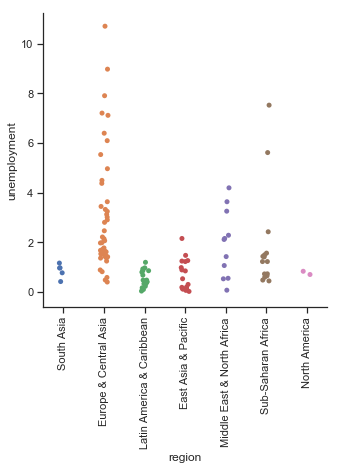

In [4]:
sns.catplot(x="region", y="unemployment", data=world_data)
plt.xticks(rotation=90) # rotate the x-axis labels
plt.show()

Notice how the dots seem to be randomly scattered in the columns.  This is called jittering.  We can control the amount of jitter using the jitter parameter:

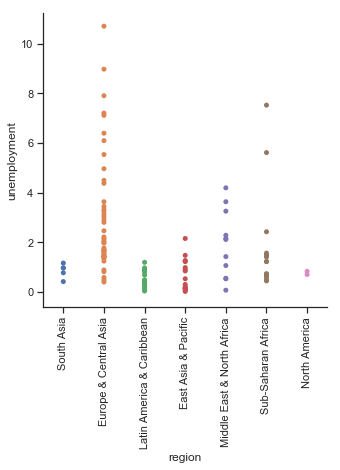

In [5]:
sns.catplot(x="region", y="unemployment", jitter=0, data=world_data)
plt.xticks(rotation=90) # rotate the x-axis labels
plt.show()

## Beeswarm plot
If we have a small number of points, we can use a beeswarm plot instead of the jitter approach:

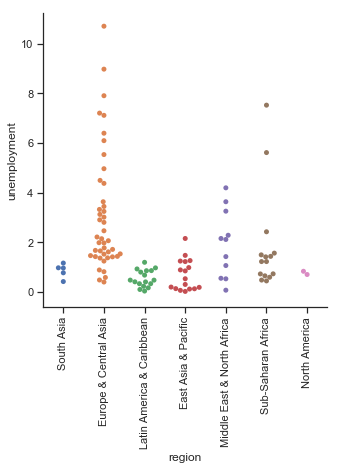

In [6]:
sns.catplot(kind="swarm", x="region", y="unemployment", data=world_data)
plt.xticks(rotation=90)
plt.show()

We can add a hue parameter to show another feature:

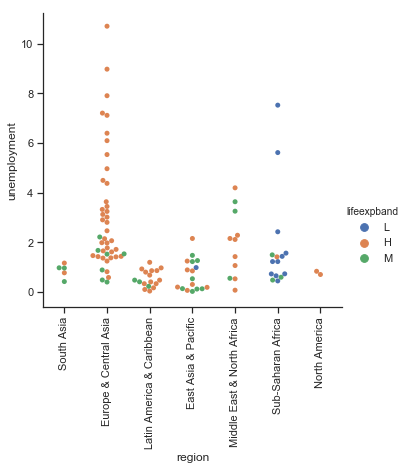

In [7]:
sns.catplot(kind="swarm", x="region", y="unemployment", hue="lifeexpband", data=world_data)
plt.xticks(rotation=90)
plt.show()

Let's flip the x and hue:

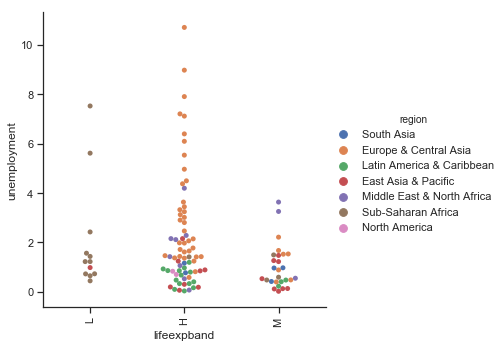

In [8]:
sns.catplot(kind="swarm", x="lifeexpband", y="unemployment", hue="region", data=world_data)
plt.xticks(rotation=90)
plt.show()

But the sort order on the x axis (L, H, M) is not right, so let's fix that:

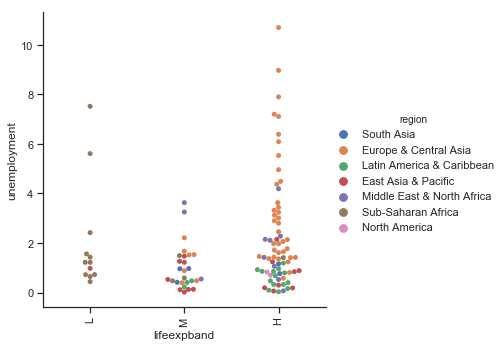

In [9]:
sns.catplot(kind="swarm", x="lifeexpband", y="unemployment", hue="region", order=["L","M","H"], data=world_data)
plt.xticks(rotation=90)
plt.show()

If we put the categorical feature on the y axis, the chart automatically flips:

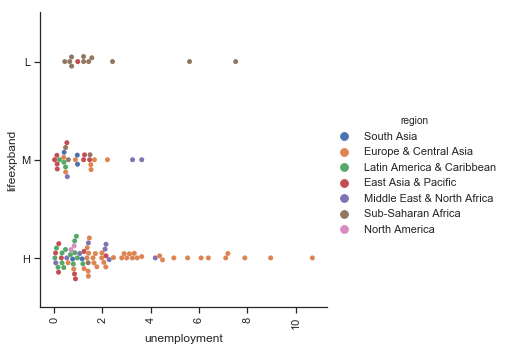

In [10]:
sns.catplot(kind="swarm", y="lifeexpband", x="unemployment", hue="region", order=["L","M","H"], data=world_data)
plt.xticks(rotation=90)
plt.show()

## Boxplots
Boxplots are used to summarise the distribution of a feature.

Let's create a boxplot of the unemployment (long term unemployment rate percentage) for our regions.

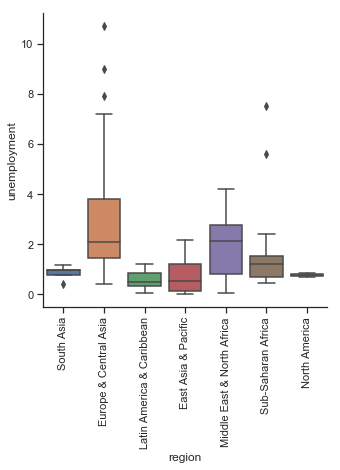

In [11]:
sns.catplot(x="region", y="unemployment", kind="box", data=world_data)
plt.xticks(rotation=90)
plt.show()

The interpretation of box plots is not immediately obvious, so a little explainer helps:
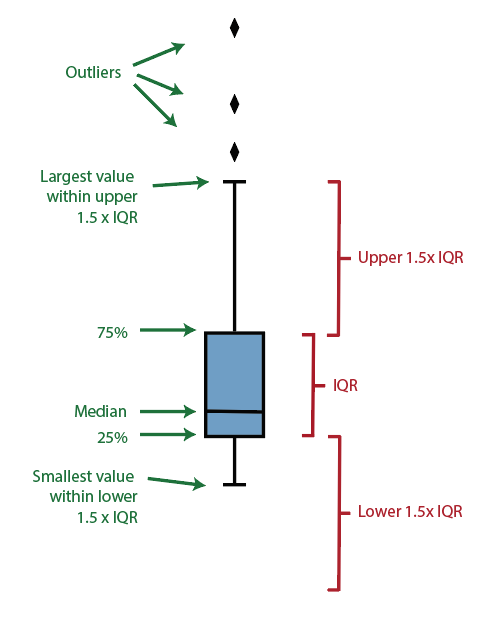

The main box shows the inter-quartile range (IQR) (where 3/4 of our data sits).  The bar in the middle of the box is the median.  The "whiskers" extend to the highest and lowest data points within 1.5x the IQR of the top and bottom of the box.  Anything that sits above the whisker is considered an outlier.

We can split out the data based on happiness band using the hue parameter.  I've also used the height and aspect parameters to control the size and shape of the plot:

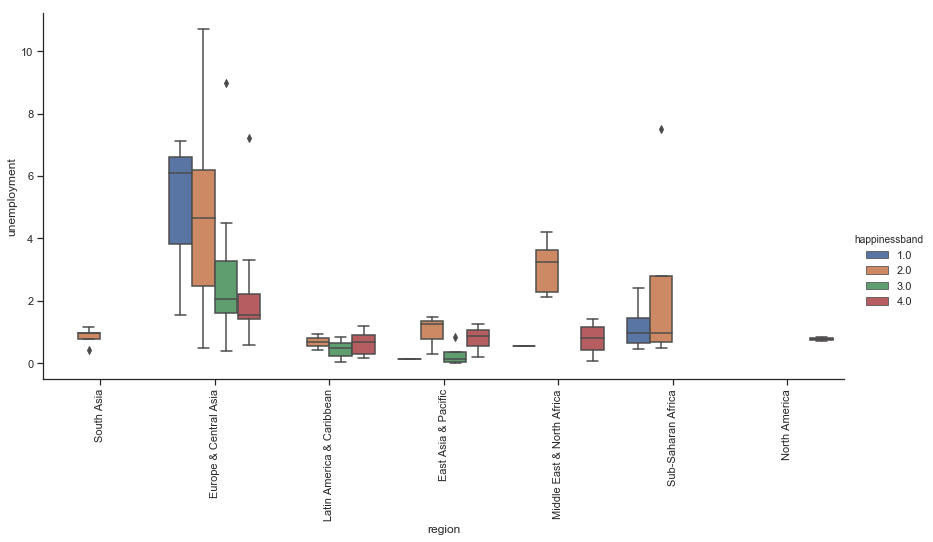

In [12]:
sns.catplot(kind="box", x="region", y="unemployment", hue="happinessband", height=6, aspect=2, data=world_data)
plt.xticks(rotation=90)
plt.show()

A boxen plot is similar, but gives more information about the shape of the distribution.

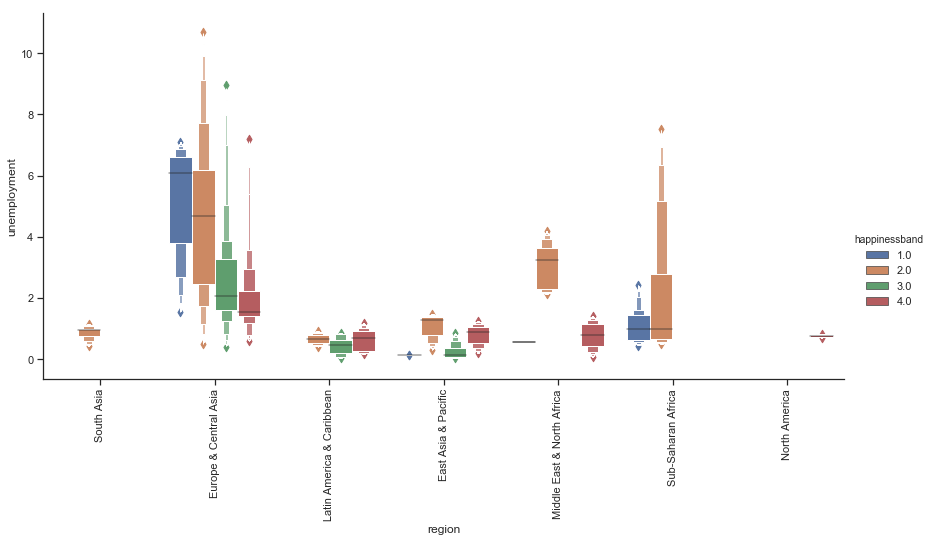

In [13]:
sns.catplot(kind="boxen", x="region", y="unemployment", hue="happinessband", height=6, aspect=2, data=world_data)
plt.xticks(rotation=90)
plt.show()

## Violin plots
The violin plot combines a boxplot with a kernel density estimate, which shows the distribution of the feature.  The "violin" is the KDE. The box and whiskers are shown inside the violin.

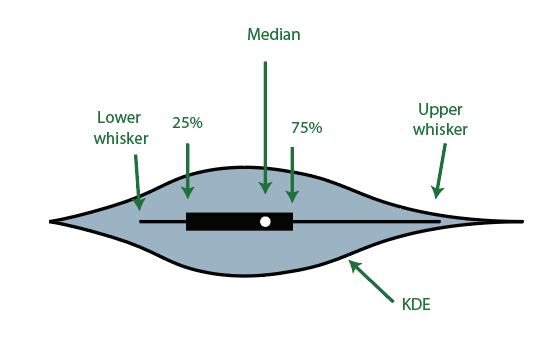

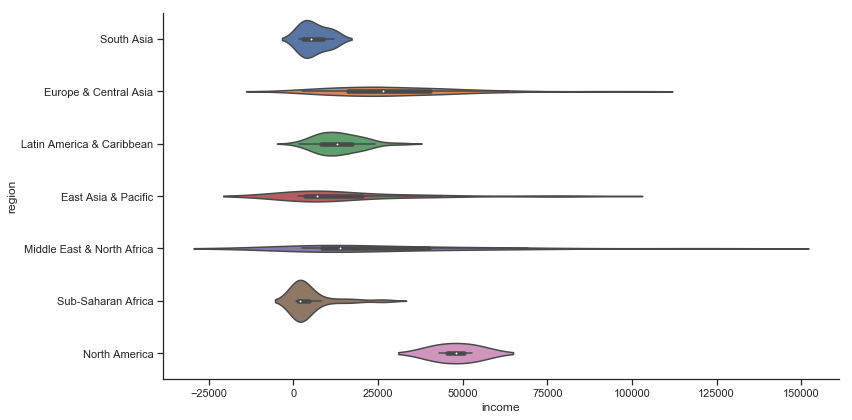

In [14]:
sns.catplot(kind="violin", y="region", x="income", height=6, aspect=2, data=world_data)
plt.show()

We can also split the violin on a 2-class feature, by specifying a hue and the split parameter.

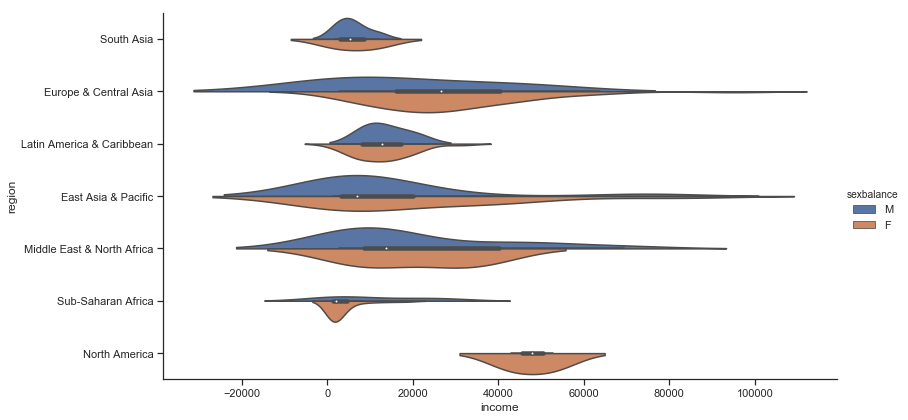

In [15]:
sns.catplot(kind="violin", y="region", x="income", hue="sexbalance", split=True, height=6, aspect=2, data=world_data)
plt.show()

We can draw sticks for the individial data points.

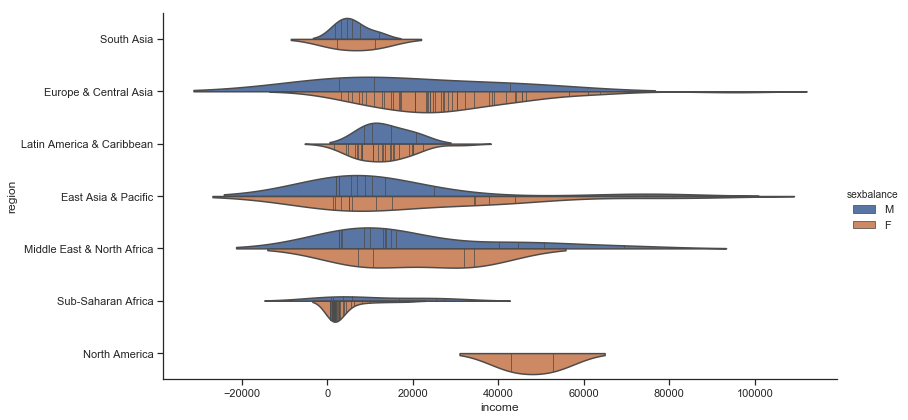

In [16]:
sns.catplot(kind="violin", y="region", x="income", hue="sexbalance", split=True, inner="stick", height=6, aspect=2, data=world_data)
plt.show()

We can combine plots.  Here a violin and swarm.

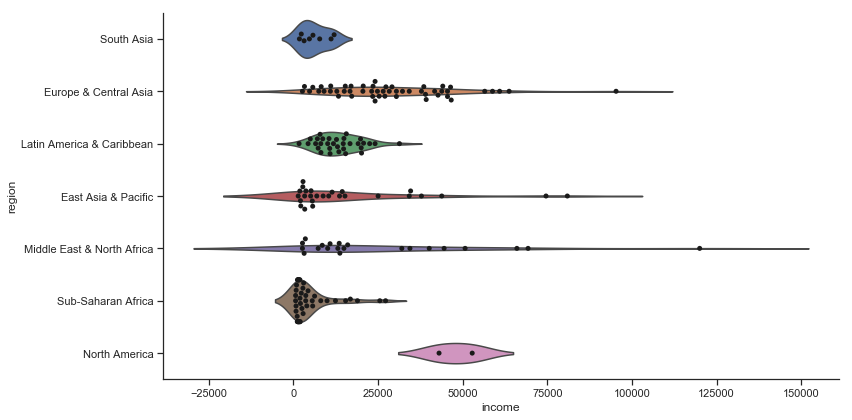

In [17]:
g = sns.catplot(kind="violin", y="region", x="income", height=6, aspect=2, inner=None, data=world_data)
sns.swarmplot(y="region", x="income", color="k", data=world_data, ax = g.ax)
plt.show()

## Bar plots
We can make simple bar plots.

Here, we will plot energy consumption for the regions, which will require Seaborn to aggregate our data (defaulting to the mean):

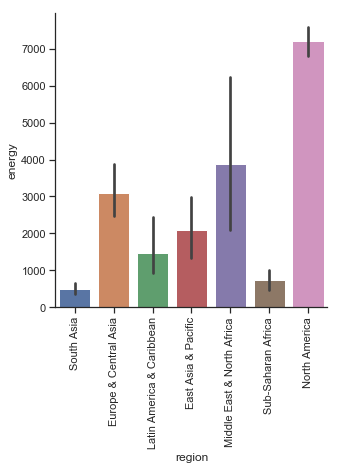

In [18]:
sns.catplot(kind="bar", x="region", y="energy", data=world_data)
plt.xticks(rotation=90)
plt.show()

Note we also get a vertical black bar showing the 95% confidence interval when aggregating data.

Of course, we can also use the hue parameter to split out the bars.

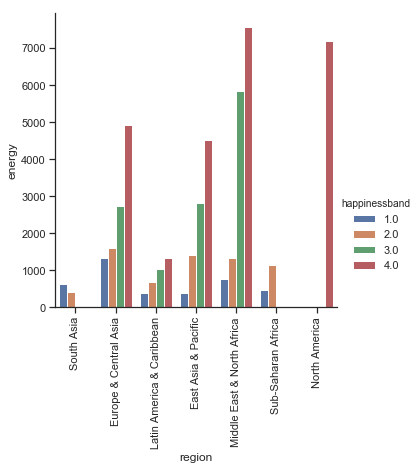

In [19]:
sns.catplot(kind="bar", x="region", y="energy", hue="happinessband", ci=None, data=world_data)
plt.xticks(rotation=90)
plt.show()

## Histogram

We can plot a histogram, here counting the number of countries in each region.

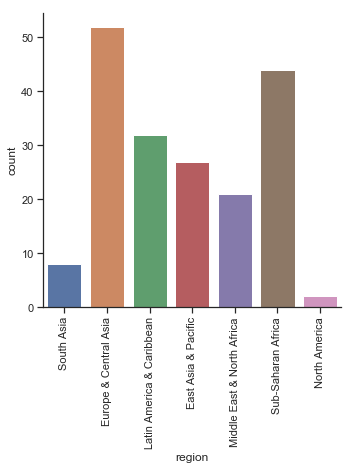

In [20]:
sns.catplot(kind="count", x="region", data=world_data)
plt.xticks(rotation=90)
plt.show()

## Point plots
Point plots show the same information as bar plots, but using points to represent the top of the bar.  Again, vertical bars area used to show the 95% confidence interval.

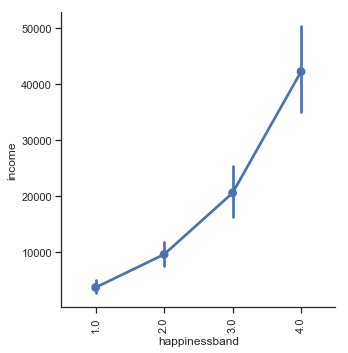

In [21]:
sns.catplot(kind="point", x="happinessband", y="income", data=world_data)
plt.xticks(rotation=90)
plt.show()

Hopefully, you can see that the above shows the same as the bar plot below.

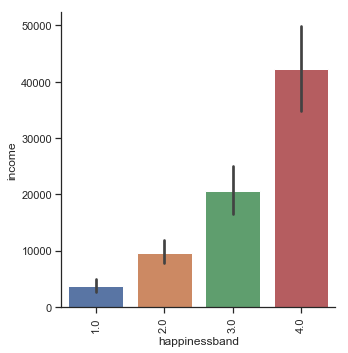

In [22]:
sns.catplot(kind="bar", x="happinessband", y="income", data=world_data)
plt.xticks(rotation=90)
plt.show()

As you might expect, we can use the hue parameter to split the data out.

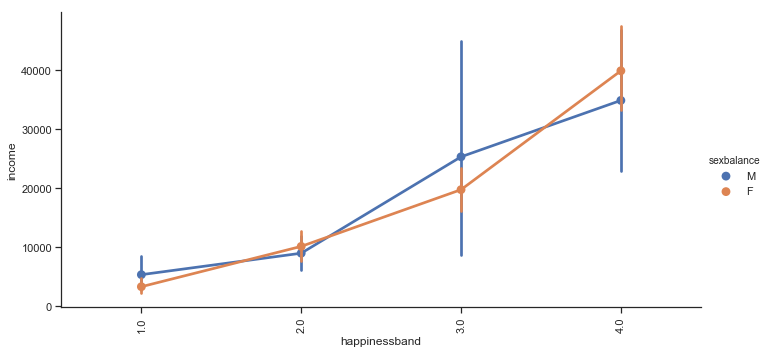

In [23]:
sns.catplot(kind="point", x="happinessband", y="income", hue="sexbalance", aspect=2, data=world_data)
plt.xticks(rotation=90)
plt.show()

## Wide format data
So far we have been working with "long form" data or ["tidy data"](https://en.wikipedia.org/wiki/Tidy_data).  Here, each feature is on a column:

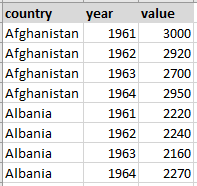

Long form is the preferred form for our data.

Wide format data is where the data is pivotted so one feature's values are put on the columns:

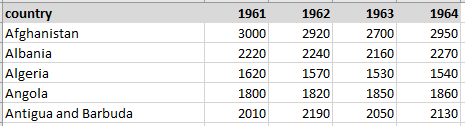

Sometimes it is convenient to take wide form data straight to a plot without pivotting.  Seaborn can do this:

In [24]:
food_supply_wide = pd.read_csv('food_supply_kilocalories_per_person_and_day.csv')

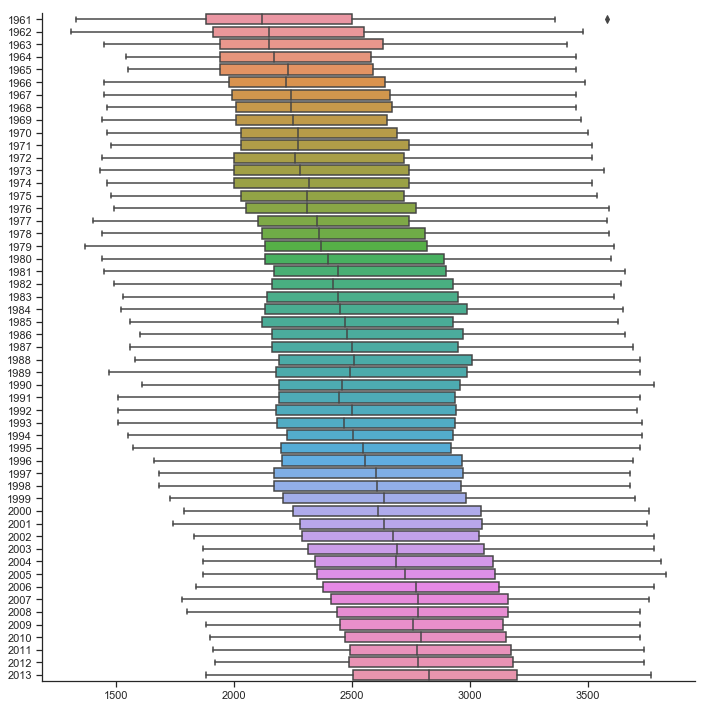

In [25]:
sns.catplot(data=food_supply_wide, orient="h", height= 10, kind="box");

## Facets

We can add the col parameter to split out by facets.

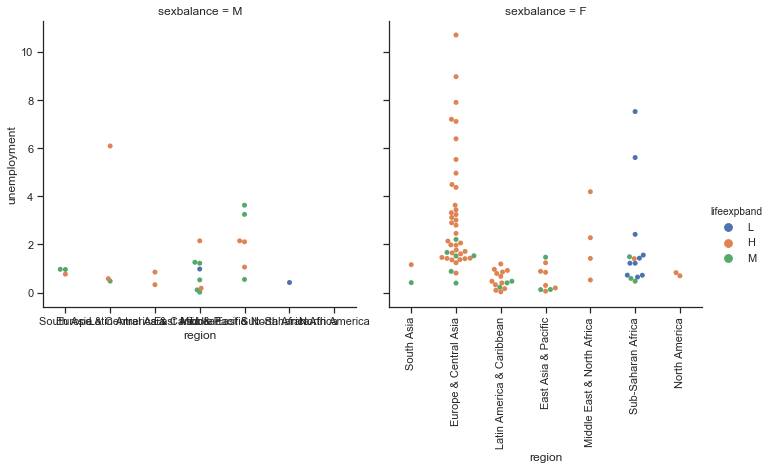

In [26]:
sns.catplot(kind="swarm", x="region", y="unemployment", hue="lifeexpband", col="sexbalance", data=world_data)
plt.xticks(rotation=90)
plt.show()

The above problem, where only the last plot has the axes rotated, is because Matplotlib's plt.xticks() only applies to the "current" "axes".  To fix this, we need to get all the axes and set the rotation.

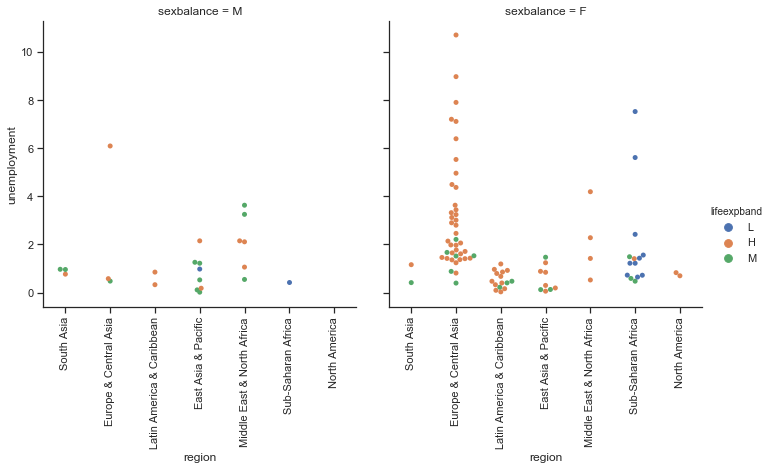

In [27]:
sns.catplot(kind="swarm", x="region", y="unemployment", hue="lifeexpband", col="sexbalance", data=world_data)

# Rotate all "axes"
fig = plt.gcf()
allaxes = fig.get_axes()
for ax in allaxes:
    plt.sca(ax)
    plt.xticks(rotation=90)
    
plt.show()

<hr/>

## Activity >>
Do some more investigations on the world data set applying the above techniques.

<hr/>
